# Documentação do Código: Classificação com Árvore de Decisão

## Introdução
Este código implementa um modelo de classificação utilizando uma **árvore de decisão** para prever a mão de pôquer de um conjunto de dados. O modelo é treinado com um dataset contendo informações sobre cartas e seus valores, aplicando **One-Hot Encoding** para transformar atributos categóricos, e avaliando o desempenho da classificação com diversas métricas.

## Bibliotecas Utilizadas
- **pandas**: Para carregar e manipular o conjunto de dados.
- **matplotlib.pyplot**: Para visualizar a árvore de decisão.
- **sklearn.model_selection**: Para dividir os dados em treino e teste.
- **sklearn.preprocessing**: Para transformar atributos categóricos em valores numéricos.
- **sklearn.tree**: Para criar e visualizar a árvore de decisão.
- **sklearn.metrics**: Para calcular as métricas de desempenho do modelo.

## Passo a Passo do Código

### 1. Carregamento do Conjunto de Dados
```python
file_path = "poker-hand-testing.csv"  # Substitua pelo caminho correto do arquivo

df = pd.read_csv(file_path)
```
O conjunto de dados é lido a partir de um arquivo CSV usando `pandas.read_csv()`.

### 2. Separar Atributos (X) e Rótulos (y)
```python
X = df.drop(columns=['Poker Hand'])
y = df['Poker Hand']
```
- **`X`**: Contém os atributos do dataset, excluindo a coluna de classe ('Poker Hand').
- **`y`**: Contém os rótulos das classes (mãos de pôquer).

### 3. Transformar Atributos Categóricos
```python
categorical_features = [f'Suit of Card {i}' for i in range(1, 6)]
X = pd.get_dummies(X, columns=categorical_features)
```
Os valores categóricos (naipes das cartas) são transformados em atributos binários usando `pd.get_dummies()`, uma técnica conhecida como **One-Hot Encoding**.

### 4. Dividir o Conjunto de Dados em Treino e Teste
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
```
- **80%** dos dados são usados para treino.
- **20%** dos dados são usados para teste.
- **`stratify=y`** garante que a divisão mantenha a mesma proporção de classes do dataset original.

### 5. Criar e Treinar a Árvore de Decisão (Modelo Completo)
```python
clf_full = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_split=50, random_state=42)
clf_full.fit(X_train, y_train)
```
A árvore de decisão é treinada com:
- **`criterion="entropy"`** → Usa a entropia para medir a impureza dos nós.
- **`max_depth=None`** → A árvore cresce até o limite máximo.
- **`min_samples_split=50`** → Um nó só é dividido se tiver pelo menos 50 amostras.

### 6. Avaliação do Modelo
```python
y_pred = clf_full.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)
```
As métricas calculadas são:
- **Acurácia**: Proporção de predições corretas.
- **Precisão (macro)**: Média da precisão de cada classe.
- **Revocação (macro)**: Média da revocação de cada classe.
- **Medida-F (macro)**: Média harmônica entre precisão e revocação.
- **Matriz de confusão**: Exibe o desempenho do modelo na classificação.

### 7. Criar um Modelo Reduzido para Visualização
```python
clf_visual = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=50, random_state=42)
clf_visual.fit(X_train, y_train)
```
Criamos uma segunda árvore com **`max_depth=5`** apenas para melhorar a visualização.

### 8. Visualizar e Salvar a Árvore de Decisão
```python
plt.figure(figsize=(20, 10))
plot_tree(clf_visual,
          filled=True,
          feature_names=X.columns,
          class_names=[str(i) for i in range(10)],
          fontsize=8,
          rounded=True)
plt.savefig("decision_tree.png", dpi=300, bbox_inches="tight")
plt.show()
```
- A árvore é gerada e salva como **"decision_tree.png"**.
- O parâmetro `rounded=True` melhora a legibilidade dos nós.
- `fontsize=8` evita sobreposição de texto.

### 9. Exibir os Resultados no Console
```python
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão (macro): {precision:.4f}")
print(f"Revocação (macro): {recall:.4f}")
print(f"Medida-F (macro): {f1:.4f}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Árvore de decisão salva como 'decision_tree.png'.")
```
Os resultados da avaliação são exibidos no console, incluindo as métricas e a matriz de confusão.

## Conclusão
Esse código treina uma árvore de decisão para classificar mãos de pôquer. Para manter um **bom desempenho** e uma **boa visualização**, dois modelos são criados:
1. **Modelo Completo**: Sem limite de profundidade, usado para predições.
2. **Modelo para Visualização**: Com profundidade `max_depth=5`, para gerar uma imagem mais clara.

Isso permite obter um modelo preciso sem comprometer a interpretação da árvore gerada.



Acurácia: 0.6257
Precisão (macro): 0.3889
Revocação (macro): 0.1637
Medida-F (macro): 0.1811
Matriz de Confusão:
[[113817  36335    199      2      0     10      0      0      0      0]
 [ 53123  71536   1762    255     66      6      1      0      0      0]
 [  3212   9297   1518    215     31      0     14      0      0      0]
 [   577   4673    272    800      7      0      7      0      0      0]
 [     0   1076     51      2     36      0      0      0      0      0]
 [   505     91      0      0      0      3      0      0      0      0]
 [    18    215    114     72      0      0      8      0      0      0]
 [     0     32     11     23      0      0      1      2      0      0]
 [     0      4      0      0      0      0      0      0      0      0]
 [     0      1      0      0      0      0      0      0      0      0]]


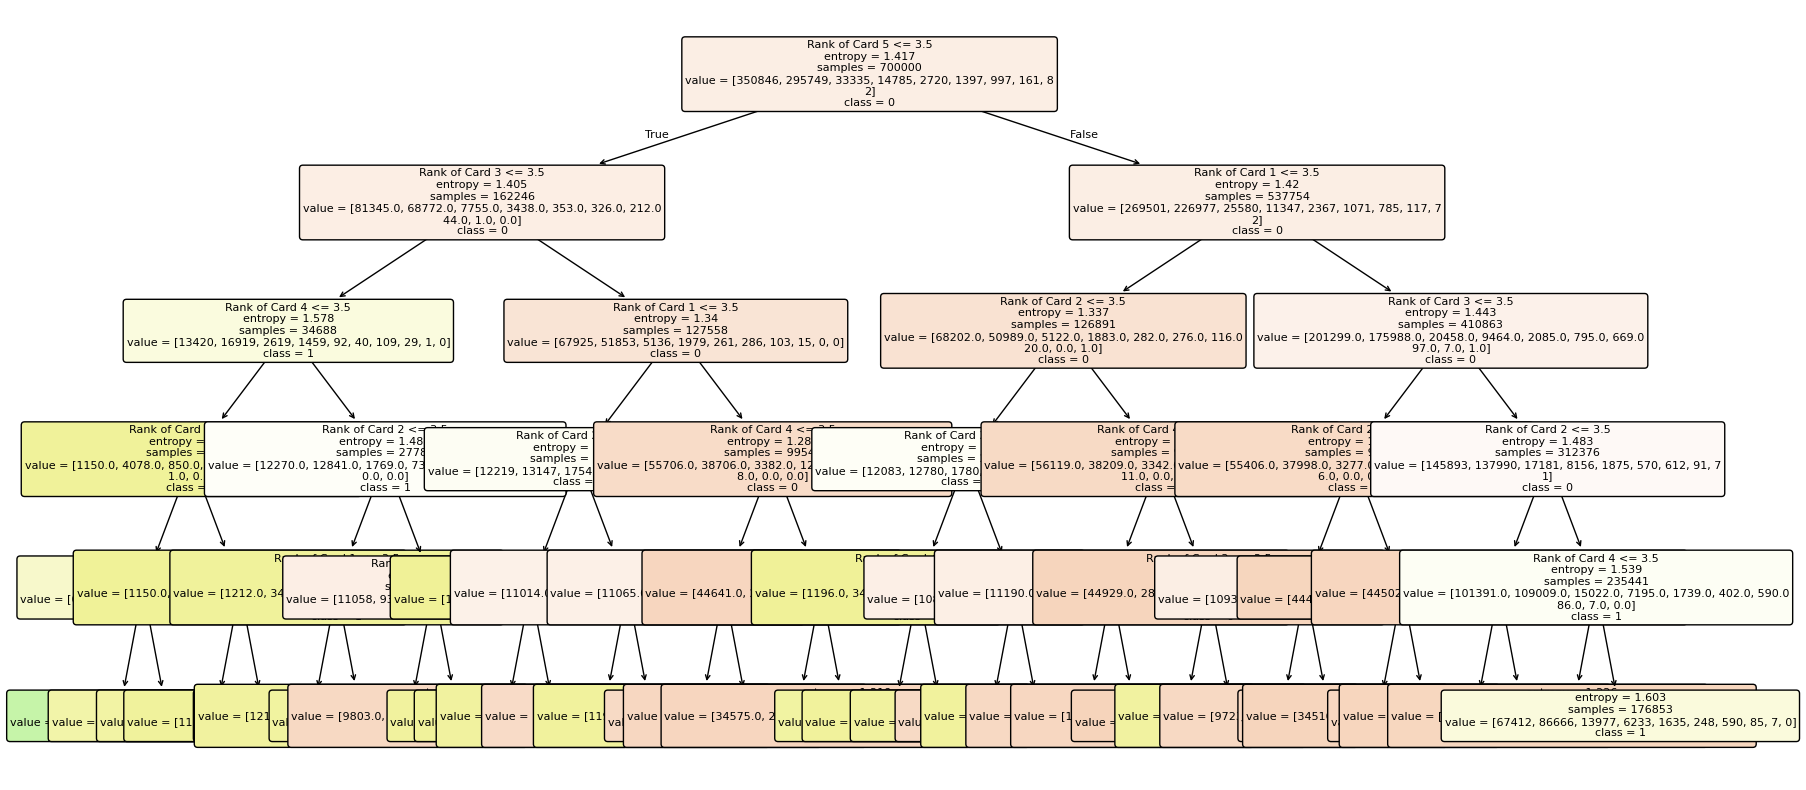

Árvore de decisão salva como 'decision_tree.png'.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Carregar o conjunto de dados
file_path = "poker-hand-testing.csv"

df = pd.read_csv(file_path)

# Separar atributos (X) e rótulos (y)
X = df.drop(columns=['Poker Hand'])
y = df['Poker Hand']

# One-Hot Encoding para atributos categóricos (naipes das cartas)
categorical_features = [f'Suit of Card {i}' for i in range(1, 6)]
X = pd.get_dummies(X, columns=categorical_features)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Modelo Completo (profundidade máxima para obter boa acurácia)
clf_full = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_split=50, random_state=42)
clf_full.fit(X_train, y_train)

# Fazer previsões e calcular métricas no modelo completo
y_pred = clf_full.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir os resultados
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão (macro): {precision:.4f}")
print(f"Revocação (macro): {recall:.4f}")
print(f"Medida-F (macro): {f1:.4f}")
print("Matriz de Confusão:")
print(conf_matrix)

#  Modelo para Visualização (árvore menor para plotar)
clf_visual = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=50, random_state=42)
clf_visual.fit(X_train, y_train)

# Gerar e salvar a árvore de decisão em um arquivo PNG
plt.figure(figsize=(20, 10))
plot_tree(clf_visual,
          filled=True,
          feature_names=X.columns,
          class_names=[str(i) for i in range(10)],
          fontsize=8,
          rounded=True)
plt.savefig("decision_tree.png", dpi=300, bbox_inches="tight")  # Salvar imagem em alta qualidade
plt.show()

print("Árvore de decisão salva como 'decision_tree.png'.")



